https://github.com/opencv/opencv/blob/master/samples/python/gaussian_mix.py

In [1]:
#!/usr/bin/env python
# Python 2/3 compatibility
from __future__ import print_function
import sys
PY3 = sys.version_info[0] == 3
if PY3:
    xrange = range

import numpy as np
from numpy import random
import cv2 as cv

In [3]:
def make_gaussians(cluster_n, img_size):
    points = []
    ref_distrs = []
    for _i in xrange(cluster_n):
        mean = (0.1 + 0.8*random.rand(2)) * img_size
        a = (random.rand(2, 2)-0.5)*img_size*0.1
        cov = np.dot(a.T, a) + img_size*0.05*np.eye(2)
        n = 100 + random.randint(900)
        pts = random.multivariate_normal(mean, cov, n)
        points.append( pts )
        ref_distrs.append( (mean, cov) )
    points = np.float32( np.vstack(points) )
    return points, ref_distrs

In [4]:
def draw_gaussain(img, mean, cov, color):
    x, y = np.int32(mean)
    w, u, _vt = cv.SVDecomp(cov)
    ang = np.arctan2(u[1, 0], u[0, 0])*(180/np.pi)
    s1, s2 = np.sqrt(w)*3.0
    cv.ellipse(img, (x, y), (s1, s2), ang, 0, 360, color, 1, cv.LINE_AA)

sampling distributions...
EM (opencv) ...
ready!



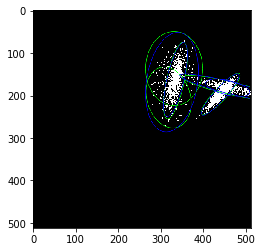

In [9]:
import matplotlib.pyplot as plt
cluster_n = 5
img_size = 512
print('sampling distributions...')
points, ref_distrs = make_gaussians(cluster_n, img_size)

print('EM (opencv) ...')
em = cv.ml.EM_create()
em.setClustersNumber(cluster_n)
em.setCovarianceMatrixType(cv.ml.EM_COV_MAT_GENERIC)
em.trainEM(points)
means = em.getMeans()
covs = em.getCovs()  # Known bug: https://github.com/opencv/opencv/pull/4232
found_distrs = zip(means, covs)
print('ready!\n')

img = np.zeros((img_size, img_size, 3), np.uint8)
for x, y in np.int32(points):
    cv.circle(img, (x, y), 1, (255, 255, 255), -1)
for m, cov in ref_distrs:
    draw_gaussain(img, m, cov, (0, 255, 0))
for m, cov in found_distrs:
    draw_gaussain(img, m, cov, (0, 0, 255))

plt.imshow(img)
plt.show()

### [OpcnCV K-Means Tutorial (en)](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)

### [OpenCV Sample Code](https://github.com/opencv/opencv/blob/master/samples/python/kmeans.py)

Automatically created module for IPython interactive environment
Color Palette


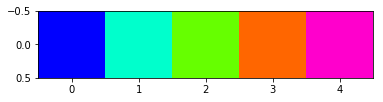

sampling distributions...
points shape:(3234, 2)(float32)
2次元データをnクラスに分類する
compactness:2163623.6571511626, centers=[[ 373.31295776  164.52804565]
 [ 216.96012878  339.09667969]
 [ 457.09814453  336.06524658]
 [ 168.00062561  369.24087524]
 [ 384.34295654  266.00842285]]


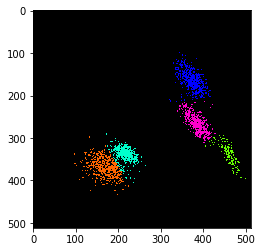

In [32]:
import matplotlib.pyplot as plt
cluster_n = 5
img_size = 512

print(__doc__)

# generating bright palette
colors = np.zeros((1, cluster_n, 3), np.uint8)
colors[0,:] = 255
colors[0,:,0] = np.arange(0, 180, 180.0/cluster_n)
colors = cv.cvtColor(colors, cv.COLOR_HSV2BGR)[0]
print('Color Palette')
plt.imshow(colors.reshape(1,cluster_n,3))
plt.show()

print('sampling distributions...')
points, _ = make_gaussians(cluster_n, img_size)
print('points shape:{}({})'.format(points.shape,points.dtype))

print('2次元データをnクラスに分類する')
term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_MAX_ITER, 30, 0.1) #( type, max_iter, epsilon=required accuracy )
compactness, labels, centers = cv.kmeans(points, cluster_n, None, term_crit, attempts=10, flags=cv.KMEANS_PP_CENTERS)
print('compactness:{}\ncenters={}'.format(compactness, centers))

img = np.zeros((img_size, img_size, 3), np.uint8)
for (x, y), label in zip(np.int32(points), labels.ravel()):
    c = list(map(int, colors[label]))

    cv.circle(img, (x, y), 1, c, -1)

plt.imshow(img)
plt.show()

# 3Dimension data(RGB) -> kmeans (5 cluster) -> PCA (2Dimension)

[OpenCV Kmeans tutorial](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)

[OpenCV PCA doc](https://docs.opencv.org/3.3.1/d2/de8/group__core__array.html#ga4e2073c7311f292a0648f04c37b73781)
[PCA sample](https://qiita.com/konnyakmannan/items/6b32c639f9f7c38280ac)

image:(342, 548, 3)(uint8)


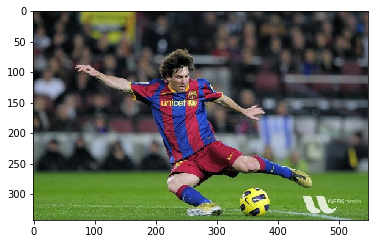

points shape:(187416, 3)(float32)

K-Means process. K=12
compactness:93357899.15433937
centers=[[ 154.58467102   40.18753815   67.5602417 ]
 [  19.55205727   21.68507195   24.75199127]
 [  96.34555054   90.92650604   89.53525543]
 [ 128.49992371  155.09324646   71.55542755]
 [ 147.4342041   155.87037659  168.80328369]
 [  71.61844635   65.62062073   66.37605286]
 [  96.5346756   140.20985413   48.35152054]
 [  44.16375732   42.60961914   47.15667343]
 [  42.49664688   61.7183342   155.01359558]
 [ 201.72956848  193.53817749  186.65974426]
 [ 116.11884308  121.11884308  124.3237381 ]
 [ 219.21321106  215.61103821   96.25476837]]
color of centers


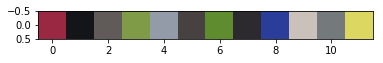

In [116]:
import matplotlib.pyplot as plt
bgr = cv.imread('messi5.jpg')
rgb = cv.cvtColor(bgr,cv.COLOR_BGR2RGB)

print('image:{}({})'.format(rgb.shape,rgb.dtype))
plt.imshow(rgb)
plt.show()

cluster_n = 12

img_size = rgb.shape[0] * rgb.shape[1] # height * width

points=rgb.reshape(img_size,3).astype('float32')
print('points shape:{}({})'.format(points.shape,points.dtype))

print('\nK-Means process. K={}'.format(cluster_n))
term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_MAX_ITER, 30, 0.1) #( type, max_iter, epsilon=required accuracy )
compactness, labels, centers = cv.kmeans(points, cluster_n, None, term_crit, attempts=10, flags=cv.KMEANS_PP_CENTERS)
print('compactness:{}\ncenters={}'.format(compactness, centers))

print ('color of centers')
colormap = centers.astype('uint8').reshape(1,cluster_n,3)
plt.imshow(colormap)
#print(centers.shape,centers.dtype)
#print(colormap.shape,colormap.dtype)


### PCA of cluster-centers (3 dimensions -> 2 dimensions) for Visualizeing

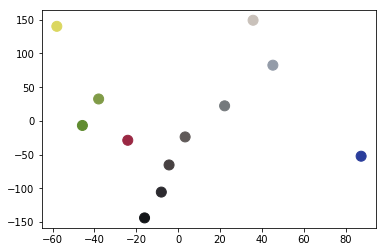

In [121]:
mean, eigenvectors = cv.PCACompute(
    data=centers,
    mean=np.mean(centers, axis=0).reshape(1, -1),
    maxComponents=2)
#print(mean,eigenvectors)
#print(centers)

colormap2 = [(r/255,g/255,b/255) for r,g,b in colormap[0]]
#print(colormap2)
results = cv.PCAProject(centers,mean,eigenvectors)
#print (results)
plt.scatter(results[:,1], results[:,0],100,colormap2,'o')
plt.show()

### find Nearest Color in centers

(187416, 3) float32
resultlabels (187416, 1) float32 [[ 7.]
 [ 7.]
 [ 7.]
 [ 7.]
 [ 7.]]
colormap (1, 12, 3) uint8
(342, 548, 3) uint8


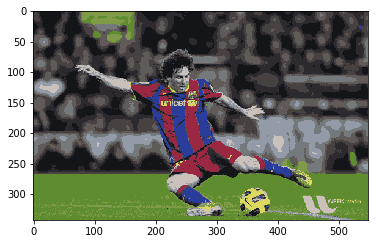

In [146]:
#centers をクラスラベルのリストに変換
centerslabel=np.array([idx for idx,center in enumerate(centers)],dtype='float32')

# Compute Nearest of images's rgb value  -> results is label list
print(points.shape,points.dtype)
knn = cv.ml.KNearest_create()
knn.train(centers,cv.ml.ROW_SAMPLE ,centerslabel)
ret, resultlabels, neighbours, dist = knn.findNearest(points, 1)
print('resultlabels',resultlabels.shape,resultlabels.dtype,resultlabels[:5])

# 元画像の全ピクセルにcolormapの色を割り当て
print('colormap',colormap.shape,colormap.dtype)
img = [colormap[0][resultlabels[idx].astype('uint8')][0] for idx in range(len(resultlabels))]
img = np.array(img,dtype='uint8')
resultsimg = img.reshape(rgb.shape[0],rgb.shape[1],rgb.shape[2])
print(resultsimg.shape,resultsimg.dtype)
plt.imshow(resultsimg)
plt.show()

#### histgram

[OpenCV Tutorial](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html)

resultlabels (187416, 1) float32 [ 7.]


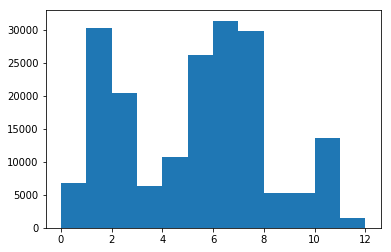

In [148]:
print('resultlabels',resultlabels.shape,resultlabels.dtype,resultlabels[0])
#hist = cv2.calcHist([resultlabels],[0],None,[cluster_n],[0,cluster_n])
plt.hist(resultlabels,cluster_n,[0,cluster_n])
plt.show()

# Image Descriptor (64 dimensions)

(771, 64)
771
Color Palette


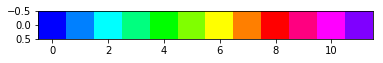

compactness:163.27576575428247
centers=[-0.00398123 -0.01690885  0.07624978  0.10941552  0.00124318 -0.08306932
  0.11867767  0.19079226  0.03256134 -0.0685229   0.13639104  0.20847745
 -0.00472094 -0.00599022  0.09460669  0.1202398  -0.02424499  0.03691094
  0.11328568  0.17100661 -0.02622976  0.12553906  0.1688357   0.33384648
  0.03130287  0.0471038   0.19986288  0.29507905  0.02218409 -0.01970745
  0.12216519  0.15004067  0.00135958 -0.02312678  0.10786457  0.13309951
 -0.01206385 -0.03795785  0.17017557  0.23559698 -0.040462   -0.03382521
  0.16673934  0.18870933  0.02513342 -0.006908    0.09228016  0.105557
  0.00172592 -0.00195523  0.06570084  0.06629942 -0.00899345 -0.00245712
  0.10469215  0.10526242 -0.00721549  0.01133184  0.10286006  0.09487216
  0.01170843  0.00135235  0.06083488  0.06096683]


In [149]:
bgr = cv.imread('messi5.jpg')
gray = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)
cluster_n = 12

kaze = cv.KAZE_create() #64dimensions
kp, des = kaze.detectAndCompute(gray,None)
print(des.shape)
print(len(kp))

# generating bright palette
colors = np.zeros((1, cluster_n, 3), np.uint8)
colors[0,:] = 255
colors[0,:,0] = np.arange(0, 180, 180.0/cluster_n)
colors = cv.cvtColor(colors, cv.COLOR_HSV2BGR)[0]
print('Color Palette')
plt.imshow(colors.reshape(1,cluster_n,3))
plt.show()

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_MAX_ITER, 30, 0.1) #( type, max_iter, epsilon=required accuracy )
compactness, labels, centers = cv.kmeans(des, cluster_n, None, term_crit, attempts=10, flags=cv.KMEANS_PP_CENTERS)
print('compactness:{}\ncenters={}'.format(compactness, centers[0]))

centers of K-means -> PCA (to Visualize)
[(1.0, 0.0, 0.0), (1.0, 0.50196078431372548, 0.0), (1.0, 1.0, 0.0), (0.49803921568627452, 1.0, 0.0), (0.0, 1.0, 0.0), (0.0, 1.0, 0.50196078431372548), (0.0, 1.0, 1.0), (0.0, 0.49803921568627452, 1.0), (0.0, 0.0, 1.0), (0.50196078431372548, 0.0, 1.0), (1.0, 0.0, 1.0), (1.0, 0.0, 0.49803921568627452)]


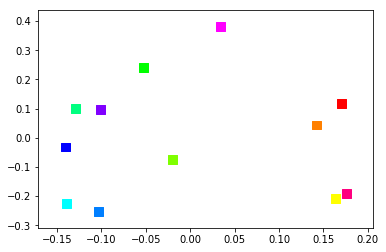

In [150]:
print('centers of K-means -> PCA (to Visualize)')
mean, eigenvectors = cv.PCACompute(
    data=centers,
    mean=np.mean(centers, axis=0).reshape(1, -1),
    maxComponents=2)
#print(mean,eigenvectors)

#for color in colors:
#    print (color)

colormap = [(r/255,g/255,b/255) for b,g,r in colors]
print(colormap)
            
results = cv.PCAProject(centers,mean,eigenvectors)
plt.scatter(results[:,1], results[:,0],80,colormap,'s')
plt.show()

## find Nearest
[KnnSearch](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_knn/py_knn_opencv/py_knn_opencv.html#knn-opencv)

[Understanding k-Nearest Neighbour](https://docs.opencv.org/3.3.1/d5/d26/tutorial_py_knn_understanding.html)

[ml.findNearest](https://docs.opencv.org/3.3.1/dd/de1/classcv_1_1ml_1_1KNearest.html#a312f975c24725b57200e221a97474b45)

(12, 64) float32
(12,) float32
(1, 64) float32
(771, 64) float32
resultlabels:  (771, 1) float32


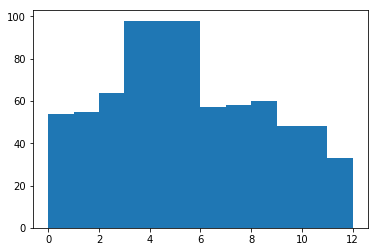

In [155]:
newcomers = np.array([[-7,-1,6,8,-8,-3,1,1,1,-3,1,1,9,-5,7,6,-2,1,1,1,-1,2,1,2,4,3,1,1,2,4,1,\
             1,2,7,1,1,1,1,1,3,-7,7,2,2,-5,-1,1,1,3,3,9,1,-1,-2,1,1,-6,-3,1,1,-1,1,8,7]],dtype='float32')
centerslabel=np.array([idx for idx,center in enumerate(centers)],dtype='float32')

print(centers.shape,centers.dtype)
print(centerslabel.shape,centerslabel.dtype)
print(newcomers.shape,newcomers.dtype)
print(des.shape,des.dtype)

knn = cv.ml.KNearest_create()
knn.train(centers,cv.ml.ROW_SAMPLE ,centerslabel)
ret, resultlabels, neighbours, dist = knn.findNearest(des, 1)
print ("resultlabels: ", resultlabels.shape,resultlabels.dtype)

plt.hist(resultlabels,cluster_n,[0,cluster_n])
plt.show()